# load in query containing id, department name, sex & salary

In [1]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
username = "postgres"
password = "postgres"
server_name = "localhost"
port = "5432"
database_name = "SQL-Challenge" 
engine = create_engine(f'postgresql://{username}:{password}@{server_name}:{port}/{database_name}')

df = pd.read_sql("SELECT e.emp_no, d.dept_name, e.sex,s.salary FROM employees AS e LEFT JOIN dept_emp AS de ON de.emp_no=e.emp_no LEFT JOIN departments AS d ON d.dept_no=de.dept_no LEFT JOIN salaries AS s ON e.emp_no = s.emp_no;", engine)
df.head(2)

,emp_no,dept_name,sex,salary
0,10001,Development,M,60117
1,10005,Human Resources,M,78228


## Histo to break down salaries

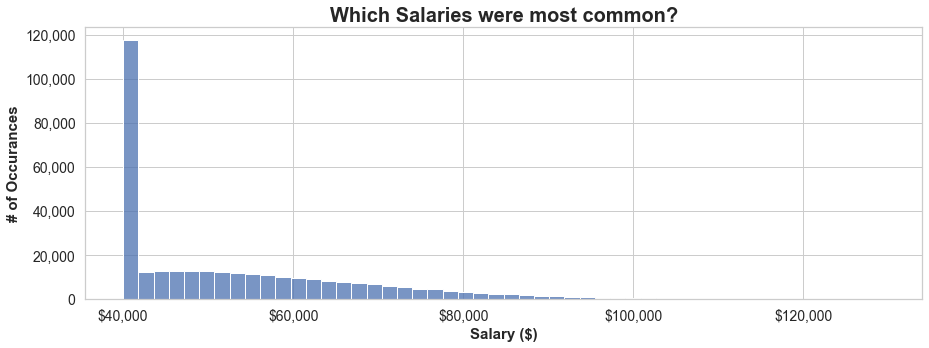

In [2]:
sns.set_theme(style="whitegrid")

# Initialize the figure Layout
fig1, ax1 = plt.subplots(figsize=(15,5))

# Plot
sns.histplot(data=df["salary"],bins=50)


# Title
ax1.set_title('Which Salaries were most common?',
             fontdict ={
                 'fontsize': 20,
                 'fontweight' : 'bold'
                         })
# Axes Titles
ax1.set_xlabel(f"Salary ($)",size=15,fontweight='bold')
ax1.set_ylabel(f"# of Occurances",size=15,fontweight='bold')

# Ticks
xticks1=ax1.get_xticks()
ax1.set_xticklabels(['${:,.0f}'.format(x)  for x in xticks1],fontdict={'fontsize':14})
yticks1=ax1.get_yticks()
ax1.set_yticklabels(['{:,.0f}'.format(y)  for y in yticks1],fontdict={'fontsize':14})

#plt.yticks(fontsize=14)

plt.show()


## spike looks odd, goin in for a closer look

In [3]:
df["salary"].value_counts()

40000     105316
44564         21
55581         21
53078         20
45050         20
           ...  
77677          1
78627          1
74239          1
102327         1
87170          1
Name: salary, Length: 50355, dtype: int64

In [15]:
no_of_emp=len(df)
no_of_40k=len(df.loc[df['salary'] == 40000])
print(f'{round(no_of_40k/no_of_emp*100,0)}% of employees all earned exactly 40k? ...questionable')

32.0% of employees all earned exactly 40k? ...questionable


# Looking for more evidence of the unbelievable

In [5]:
Sex_Count_df= df.groupby(["sex"]).count().reset_index()
Sex_Count_df = Sex_Count_df[["sex","emp_no"]]
Sex_Count_df = Sex_Count_df.rename(columns={"emp_no": "Count"})
Sex_Count_df["Colours"]=["#FF1493","#3590D0"]
Sex_Count_df

,sex,Count,Colours
0,F,132753,#FF1493
1,M,198850,#3590D0


In [6]:
Sex_Salary_df=df.groupby(['sex'],as_index=False).salary.mean()
Sex_Salary_df["Colours"]=["#FF1493","#3590D0"]
Sex_Salary_df

,sex,salary,Colours
0,F,52945.151236,#FF1493
1,M,52990.300267,#3590D0


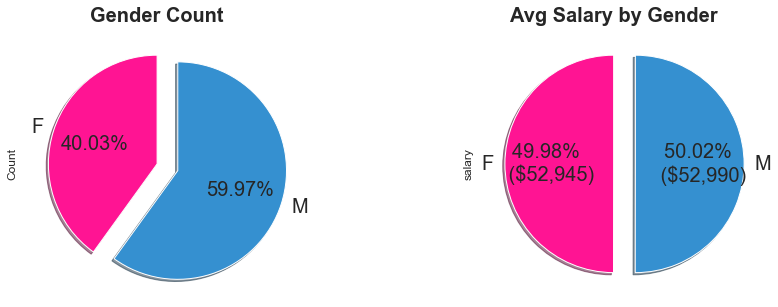

In [7]:
# Initialize the figure Layout
fig2, axes = plt.subplots(1,2,figsize=(15,5))
ax21 = axes[0]
ax22 = axes[1]


# Plot 1
Sex_Count_df.plot(kind="pie", 
               y = "Count", 
               autopct='%1.2f%%',
             textprops={'fontsize': 20},
               legend=False,
               startangle=90,
               shadow=True, 
               labels=Sex_Count_df["sex"],
               colors = Sex_Count_df["Colours"],
               explode = (0.0,0.2),
                ax=ax21)


# Title
ax21.set_title(f"Gender Count",
             fontdict ={
                 'fontsize': 20,
                 'fontweight' : 'bold'
                         })

# Plot 2
values = Sex_Salary_df["salary"] 
labels = Sex_Salary_df["sex"] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n (${v:,})'.format(p=pct,v=val)
    return my_autopct


Sex_Salary_df.plot(kind="pie", 
               y = "salary", 
               autopct=make_autopct(values),
             textprops={'fontsize': 20},
               legend=False,
               startangle=90,
               shadow=True, 
               labels=Sex_Salary_df["sex"],
               colors = Sex_Salary_df["Colours"],
               explode = (0.0,0.2),
                ax=ax22)


# Title
ax22.set_title(f"Avg Salary by Gender",
             fontdict ={
                 'fontsize': 20,
                 'fontweight' : 'bold'
                         })



plt.show()


# "FAKE DATA! 
## It is highly unlikely that a company like HP in the 80's/90's would have as high as 40% females representation with fair/even average salaries"

In [8]:
#Evidence in hand, you march into your boss's office and present the visualisation. 
#With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, 
#"Search your ID number." You look down at your badge to see that your employee ID number is 499942.
df.loc[df['emp_no'] == 499942]

,emp_no,dept_name,sex,salary
82908,499942,Development,F,40000


## Boss thinks I'm female and would be willing to work for 40k, what a joker ##
